Import important libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

# 2. Exploring data (often interleaved with preprocessing)

Read all .csv files and perform exploration.

We decide that we wouldn't use the book_id.csv file since it is redundant

First, we will read data file "book_data.csv" and save to DataFrame `book_df`. 

In [2]:
book_df = pd.read_csv('data/book_data.csv')
book_df.head()

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...
1,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...
2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929.0,Sách tư duy - Kỹ năng sống,780,4.8,184,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/d7/99/24/1...
3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896.0,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/8d/96/9e/c...
4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668.0,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội,https://salt.tikicdn.com/ts/product/45/3b/fc/a...


Second, we will read data file "comment_data.csv" and save to DataFrame `comment_df`. 

In [3]:
comment_df = pd.read_csv('data/comments.csv')
comment_df.head()

,product_id,comment_id,title,thank_count,customer_id,rating,content
0,74021317,12559756,Cực kì hài lòng,313,22051463,5,"Có những người bước đến, họ lấp đầy hạnh phúc ..."
1,74021317,16979365,Cực kì hài lòng,6,27791831,5,"Thấy nhiều bạn chê tiki gói hàng quá, may sao ..."
2,74021317,14069617,Cực kì hài lòng,25,17748750,5,"Bìa cực xinh, tiki giao hàng nhanh, sách không..."
3,74021317,8569824,Cực kì hài lòng,57,410797,5,"Sách lúc nhận hình thức rất ổn, không cong vên..."
4,74021317,18368714,Cực kì hài lòng,0,28545286,5,Một cuốn sách rất đáng đọc về tình yêu thương ...


### 2.1 How many rows and how many columns?

We get the number of rows and columns of the DataFrame `book_df` and store it in `num_rows` and `num_cols` variables.

In [4]:
num_rows = book_df.shape[0]
num_cols = book_df.shape[1]
print(f'Number of rows: ',num_rows)
print(f'Number of cols: ',num_cols)

Number of rows:  1796
Number of cols:  12


We get the number of rows and columns of the DataFrame `comment_df` and store it in `num_rows` and `num_cols` variables.

In [5]:
num_rows = comment_df.shape[0]
num_cols = comment_df.shape[1]
print(f'Number of rows: ',num_rows)
print(f'Number of cols: ',num_cols)

Number of rows:  141281
Number of cols:  7


### 2.2 What is the meaning of each column?

Meaning of each column in `book_df` describle below

| Column      | Description |
| :---        |    :----   |    
| `product_id`      | Id of the product in the Tiki database (unique)      | 
| `title`   |  Name of the book, maybe contain republish time       | 
| `authors`    |    same with it's name              |
| `original_price`    |      price at the first time             |
| `current_price`    |  price at present if having a discount                 |
| `quantity`    |  	total number of books sold of all time                 |
| `category`    |  	kind of book                 |
| `n_review`    |   number of reviews               |
| `avg_rating`    |  average rating (max 5.0)                 |
| `pages`    |     total pages of each book              |


Meaning of each column in `comment_df` describle below

| Column      | Description |
| :---        |    :----   |    
| `product_id`      | same with book_data file      | 
| `title`   |  keywork of comment       | 
| `comment_id`    |   each comment has individual id        |
| `thank_count`    |     number of like of other people            |
| `customer_id`    |  price at present if having a discount                 |
| `rating`    |  average rating of the comment             |
| `category`    |  	kind of book                 |
| `content`    |  same with it's name             |


### 2.3 Are there duplicated rows?

In [6]:
num_duplicated_rows = book_df[book_df.duplicated(keep=False)].shape[0]
num_duplicated_rows

35

In `book_df` there are 35 duplicated rows. So we will remove it

In [7]:
book_df = book_df.drop_duplicates()
num_rows = book_df.shape[0]
num_rows

1777

After remove duplicated rows, `book_df` has 1777 rows

In [8]:
num_duplicated_rows = comment_df[comment_df.duplicated(keep=False)].shape[0]
num_duplicated_rows

39299

In `comment_df` there are 39299 duplicated rows. So we will remove it

In [9]:
comment_df = comment_df.drop_duplicates()
num_rows = comment_df.shape[0]
num_rows

121393

After remove duplicated rows, `comment_df` has 121393 rows

### 2.4 What is the current data type of each column? Are there columns having inappropriate data types?

In [10]:
dtypes = pd.Series(dict(book_df.dtypes))
dtypes

product_id          int64
title              object
authors            object
original_price      int64
current_price       int64
quantity          float64
category           object
n_review            int64
avg_rating        float64
pages              object
manufacturer       object
cover_link         object
dtype: object

We can see some of data type of the column has appropriate type. Some of them in object type like `pages`,`manufacturer`, `category`, `title`, `authors`,... We will explore and convert pages into integer and the remain will be string

In [11]:
# book_df.astype({'pages': np.float32})
book_df['pages'] = pd.to_numeric(book_df['pages'] , errors='coerce')

In [12]:
def open_object_dtype(s):
    dtypes = set()
    s.apply(lambda x: dtypes.add(type(x)))
    return dtypes
print('category',open_object_dtype(book_df.category) )
print('manufacturer',open_object_dtype(book_df.manufacturer) )
book_df.loc[book_df['category'].str.strip() == '','category'] = np.nan
book_df.loc[book_df['manufacturer'].str.strip() == '','manufacturer'] = np.nan
book_df = book_df.astype({'manufacturer': str,'category':str})

category {<class 'str'>}
manufacturer {<class 'str'>, <class 'float'>}


We will replace which rows has zero characters by `np.nan` and cast them into str

In [13]:
dtypes = pd.Series(dict(comment_df.dtypes))
dtypes

product_id      int64
comment_id      int64
title          object
thank_count     int64
customer_id     int64
rating          int64
content        object
dtype: object

With `comment_df` we also see some of data type of the column has appropriate type. Some of them in object type like `title`,`content`. We will explore and convert them into string

In [14]:
print('title',open_object_dtype(comment_df.title ) )
print('content',open_object_dtype(comment_df.content ) )
comment_df.loc[comment_df['title'].str.strip() == '','title'] = np.nan
comment_df.loc[comment_df['content'].str.strip() == '','content'] = np.nan
comment_df = comment_df.astype({'title': str,'content':str})

title {<class 'str'>, <class 'float'>}
content {<class 'str'>, <class 'float'>}


### With each numerical column, how are values distributed?


Numerical columns in `book_df` is `product_id`,	`original_price`,	`current_price`,	`quantity`,	`n_review`,	`avg_rating`,	`pages`.

In [15]:
cols = book_df.select_dtypes([np.number]).columns
min = book_df[cols].min()
missing_percentage = book_df[cols].isnull().sum()/num_rows*100
lower_quartile = book_df[cols].quantile(0.25)
median = book_df[cols].quantile(0.5)
upper_quartile = book_df[cols].quantile(0.75)
max = book_df[cols].max()
nume_col_info_df = pd.concat([missing_percentage,min,lower_quartile,median,upper_quartile,max],axis = 1).T
nume_col_info_df.index = [ "missing_percentage", "min", "lower_quartile", "median", "upper_quartile", "max"]
nume_col_info_df = nume_col_info_df.round(1)
nume_col_info_df

,product_id,original_price,current_price,quantity,n_review,avg_rating,pages
missing_percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.2
min,335337.0,0.0,0.0,1.0,0.0,0.0,10.0
lower_quartile,52785564.0,89000.0,60000.0,173.0,16.0,4.8,208.0
median,115078649.0,129000.0,88800.0,565.5,74.0,4.8,300.0
upper_quartile,192908778.0,190000.0,136600.0,2127.8,303.0,5.0,408.0
max,207909812.0,1550000.0,1200000.0,671121.0,11481.0,5.0,192000.0


The maximum row for columns "pages" and "n review" is 192000 and 11481, respectively. Since it's very big, we'll have a look.

In [16]:
book_df[book_df.n_review==11481.0]

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244.0,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...


In [17]:
book_df[book_df.pages==192000.0]

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
650,201687274,Có Một Nổi Buồn Vừa Ngang Qua Đây,Gã,88000,64900,114.0,Truyện ngắn - Tản văn - Tạp Văn,6,5.0,192000.0,Nhà Xuất Bản Văn Học,https://salt.tikicdn.com/ts/product/08/fd/a5/0...


I checked the webpage, and the information is accurate.

In [18]:
book_df[book_df.original_price==0]

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
968,203875661,( Khóa Học ) IELTS Fighter Target 6.5 Speaking,NaN,0,0,56.0,Sách Học Tiếng Anh,0,0.0,NaN,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/11/b3/ec/4...


There is only one row with a price of 0. We can see that it is a course, so perhaps they are just using it as a means of advertising.

Numerical columns in `comment_df` is `product_id`, `comment_id`, `thank_count`,	`customer_id`,	`rating`.

In [19]:
cols = comment_df.select_dtypes([np.number]).columns
min = comment_df[cols].min()
missing_percentage = comment_df[cols].isnull().sum()/num_rows*100
lower_quartile = comment_df[cols].quantile(0.25)
median = comment_df[cols].quantile(0.5)
upper_quartile = comment_df[cols].quantile(0.75)
max = comment_df[cols].max()
nume_col_info_df = pd.concat([missing_percentage,min,lower_quartile,median,upper_quartile,max],axis = 1).T
nume_col_info_df.index = [ "missing_percentage", "min", "lower_quartile", "median", "upper_quartile", "max"]
nume_col_info_df = nume_col_info_df.round(1)
nume_col_info_df

,product_id,comment_id,thank_count,customer_id,rating
missing_percentage,0.0,0.0,0.0,0.0,0.0
min,335337.0,116197.0,0.0,27.0,1.0
lower_quartile,42459036.0,11576181.0,0.0,5355417.0,5.0
median,77105728.0,15459335.0,0.0,11123876.0,5.0
upper_quartile,147920903.0,17518350.0,0.0,19113314.0,5.0
max,207852961.0,18392604.0,548.0,28578516.0,5.0


The information is clear and unambiguous.

### With each categorical column, how are values distributed?

Category columns in `book_df` is `category`, `category`, `title`,	`manufacturer`,	`authors`.

In [20]:
cate_cols = set(book_df.columns) - set(book_df.select_dtypes([np.number]).columns)
missing_percentages = np.sum(book_df[cate_cols].isna()) / len(book_df) * 100
num_diff_vals = np.array(book_df[cate_cols].nunique())
diff_vals = np.array(book_df[cate_cols].apply(lambda col: col.dropna().unique()))

cate_cols = pd.DataFrame(data=np.array([missing_percentages, num_diff_vals, diff_vals]),
                            index=['Missing percentage', 'Num diff val', 'Diff val'], columns=cate_cols)
cate_cols

,authors,title,manufacturer,category,cover_link
Missing percentage,7.878447,0.0,0.0,0.0,0.0
Num diff val,1083,1769,42,355,1777
Diff val,"[José Mauro de Vasconcelos, Nguyễn Đoàn Minh T...","[Cây Cam Ngọt Của Tôi, Hành Tinh Của Một Kẻ Ng...","[Nhà Xuất Bản Hội Nhà Văn, Nhà Xuất Bản Thế Gi...","[Tiểu Thuyết, Sách tư duy - Kỹ năng sống, Lĩnh...",[https://salt.tikicdn.com/ts/product/5e/18/24/...


Category columns in `comment_df` is `title`	, `content`.

In [21]:
cate_cols = set(comment_df.columns) - set(comment_df.select_dtypes([np.number]).columns)
missing_percentages = np.sum(comment_df[cate_cols].isna()) / len(comment_df) * 100
num_diff_vals = np.array(comment_df[cate_cols].nunique())
diff_vals = np.array(comment_df[cate_cols].apply(lambda col: col.dropna().unique()))

cate_cols = pd.DataFrame(data=np.array([missing_percentages, num_diff_vals, diff_vals]),
                            index=['Missing percentage', 'Num diff val', 'Diff val'], columns=cate_cols)
cate_cols

,content,title
Missing percentage,0.0,0.0
Num diff val,75681,4164
Diff val,"[Có những người bước đến, họ lấp đầy hạnh phúc...","[Cực kì hài lòng, Bình thường, Một cuốn sách đ..."


Lets look at `manufacturer` columns. 

In [22]:
book_df.manufacturer.value_counts()

nan                                              265
Nhà Xuất Bản Thế Giới                            249
NXB Trẻ                                          145
Nhà Xuất Bản Hà Nội                              128
Nhà Xuất Bản Dân Trí                             126
Nhà Xuất Bản Kim Đồng                            113
Nhà Xuất Bản Hội Nhà Văn                         111
Nhà Xuất Bản Thanh Niên                           98
Nhà Xuất Bản Tổng hợp TP.HCM                      92
Nhà Xuất Bản Lao Động                             90
Nhà Xuất Bản Văn Học                              77
Nhà Xuất Bản Hồng Đức                             57
Nhà Xuất Bản Công Thương                          46
Nhà Xuất Bản Phụ Nữ Việt Nam                      38
Nhà Xuất Bản Phụ Nữ                               30
Nhà Xuất Bản Đà Nẵng                              17
Nhà Xuất Bản Đại Học Quốc Gia Hà Nội              13
Nhà Xuất Bản Mỹ Thuật                              8
Nhà Xuất Bản Lao Động Xã Hội                  

We will replace `NXB` by `Nhà Xuất Bản`, `hong duc` by `Nhà Xuất Bản Hồng Đức` and `ĐHQG`:`Đại Học Quốc Gia`

In [23]:
book_df['manufacturer'] = book_df['manufacturer'].replace({'NXB':'Nhà Xuất Bản','hong duc':'Nhà Xuất Bản Hồng Đức','ĐHQG':'Đại Học Quốc Gia'}, regex=True)

I checked the website and found that the authors of these books are listed as "."

In [24]:
book_df[book_df['authors']=='.'][:5]

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
145,73125816,Digital Marketing - Từ Chiến Lược Đến Thực Thi...,.,220000,154000,4487.0,Sách Marketing - Bán hàng,865,4.8,250.0,Nhà Xuất Bản Lao Động,https://salt.tikicdn.com/ts/product/d0/b7/ac/8...
270,54614797,"Có Một Ngày, Bố Mẹ Sẽ Già Đi",.,96000,58520,10530.0,Truyện ngắn - Tản văn - Tạp Văn,2252,4.8,296.0,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/89/f1/fc/1...
883,40774181,Combo Sách Tiếng hàn tổng hợp dành cho người V...,.,220000,147400,5295.0,Sách Học Tiếng Hàn,1305,5.0,436.0,nan,https://salt.tikicdn.com/ts/product/6d/97/55/e...
1194,145977554,Combo 2 Cuốn: Thần Số Học + Thần Số Học Ứng Dụng,.,348000,244000,403.0,Sách Chiêm Tinh - Horoscope,62,4.8,NaN,Nhà Xuất Bản Thanh Niên,https://salt.tikicdn.com/ts/product/e6/21/58/b...
1239,45349383,Hashtag No.2 Fashion - Kinh Doanh Thời Trang T...,.,200000,140000,1768.0,Sách Marketing - Bán hàng,213,4.8,132.0,Nhà Xuất Bản Dân Trí,https://salt.tikicdn.com/ts/product/a0/fe/92/7...


Let's look at `category` field.

In [25]:
book_df['category'].value_counts()

Sách tư duy - Kỹ năng sống                       295
Tiểu Thuyết                                      133
Truyện ngắn - Tản văn - Tạp Văn                  109
Sách nghệ thuật sống đẹp                          58
Sách kỹ năng làm việc                             56
                                                ... 
Black Jack - Tập 13 (Bìa Cứng)                     1
Vua Sáng Chế - Tập 19                              1
Blue Period - Tập 04                               1
Hành Trình Về Phương Đông (Bìa Cứng)(Tái Bản)      1
Vì Sao Phật Giáo Giàu Chân Lý                      1
Name: category, Length: 355, dtype: int64

The 'category' columns in this dataset may have been taken incorrectly by the author, resulting in some incorrect categories. We looked over the website and gathered data on every category a book might fall under.There are many categories and subcategories, however practically every book in our dataset is "Sách tiếng việt," thus we only focus on its subcategories.

In [26]:
cate = {'Sách văn học': ['Du ký','Light novel','Phê Bình - Lý Luận Văn Học', 'Phóng sự - Ký sự - Bút ký', 'Tác phẩm kinh điển','Thơ',
 'Tiểu sử - Hồi ký', 'Tiểu Thuyết','Tranh Truyện',
  'Truyện cổ tích - Ngụ ngôn','Truyện cười', 'Truyện dài', 'Truyện đam mỹ',
  'Truyện Giả tưởng - Huyền Bí - Phiêu Lưu', 'Truyện kiếm hiệp',
  'Truyện kinh dị','Truyện ngắn - Tản văn - Tạp Văn',
  'Truyện ngôn tình', 'Truyện trinh thám', 'Ca dao - Tục ngữ', 'Sách ảnh'],
 'Sách kinh tế': ['Bài học kinh doanh',
  'Sách doanh nhân',
  'Sách khởi nghiệp',
  'Sách kinh tế học',
  'Sách kỹ năng làm việc',
  'Sách Marketing - Bán hàng',
  'Sách quản trị, lãnh đạo',
  'Sách quản trị nhân lực',
  'Sách tài chính, kế toán',
  'Sách tài chính, tiền tệ'],
 'Sách thiếu nhi': ['Đạo đức - Kỹ năng sống',
  'Kiến thức - Bách khoa',
  'Tô màu - Luyện chữ',
  'Truyện cổ tích',
  'Truyện kể cho bé',
  'Truyện tranh Ehon',
  'Truyện tranh thiếu nhi',
  'Văn học thiếu nhi'],
 'Sách kỹ năng sống': ['Sách tư duy - Kỹ năng sống',
  'Sách nghệ thuật sống đẹp',
  'Sách hướng nghiệp - Kỹ năng mềm'],
 'Sách Bà mẹ - Em bé': ['Sách Thai Giáo',
  'Sách Kiến Thức - Kỹ Năng Cho Trẻ',
  'Sách Làm Cha Mẹ',
  'Sách Dinh Dưỡng - Sức Khỏe Cho Bé'],
 'Sách Giáo Khoa - Giáo Trình': ['Sách Giáo Khoa Cấp 1',
  'Sách Giáo Khoa Cấp 2',
  'Sách Giáo Khoa Cấp 3',
  'Giáo Trình Đại Học - Cao Đẳng'],
 'Sách Học Ngoại Ngữ': ['Sách Học Tiếng Anh',
  'Sách Học Tiếng Nhật',
  'Sách Học Tiếng Hàn',
  'Sách Học Tiếng Hoa',
  'Ngoại Ngữ Khác'],
 'Sách Tham Khảo': ['Sách tham khảo cấp I',
  'Sách tham khảo cấp II',
  'Sách tham khảo cấp III',
  'Sách Luyện Thi Đại Học - Cao Đẳng',
  'Thẻ luyện thi',
  'Sách chuyên đề'],
 'Từ Điển': ['Từ Điển Tiếng Anh',
  'Từ Điển Tiếng Trung',
  'Từ Điển Tiếng Hàn',
  'Từ Điển Tiếng Nhật',
  'Từ Điển Tiếng Pháp',
  'Từ Điển Tiếng Việt',
  'Từ Điển Ngôn Ngữ Khác'],
 'Sách Kiến Thức Tổng Hợp': ['Kiến Thức Bách Khoa',
  'Lĩnh vực khác',
  'Sách Chiêm Tinh - Horoscope',
  'Sách giáo dục',
  'Sách Phong Thủy - Kinh Dịch',
  'Triết Học'],
 'Sách Khoa Học - Kỹ Thuật': ['Sách Khoa Học - Kỹ Thuật'],
 'Sách Lịch sử': ['Lịch Sử Việt Nam', 'Lịch Sử Thế Giới'],
 'Điện Ảnh - Nhạc - Họa': ['Âm Nhạc - Điện Ảnh',
  'Mỹ Thuật - Kiến Trúc',
  'Sách Tô Màu Dành Cho Người Lớn'],
 'Truyện Tranh, Manga, Comic': ['Truyện Tranh, Manga, Comic'],
 'Sách Tôn Giáo - Tâm Linh': ['Sách Tôn Giáo - Tâm Linh'],
 'Sách Văn Hóa - Địa Lý - Du Lịch': ['Sách Danh Nhân',
  'Sách Địa Danh - Du Lịch',
  'Sách Phong Tục - Tập Quán'],
 'Sách Chính Trị - Pháp Lý': ['Luật - Văn Bản Luật', 'Lý Luận Chính Trị'],
 'Sách Nông - Lâm - Ngư Nghiệp': ['Sách Nông - Lâm - Ngư Nghiệp'],
 'Sách Công Nghệ Thông Tin': ['Tin Học Văn Phòng',
  'Lập Trình',
  'Thiết Kế - Đồ Họa'],
 'Thể Dục - Thể Thao': ['Thể Dục - Thể Thao'],
 'Sách Y Học': ['Sách Y Học'],
 'Tạp Chí - Catalogue': ['Tạp Chí - Catalogue'],
 'Sách Tâm lý - Giới tính': ['Sách Tâm Lý Tuổi Teen',
  'Sách Hôn Nhân - Giới Tính'],
 'Sách Thường Thức - Gia Đình': ['Chăm sóc sức khỏe',
  'May - Thêu - Thời Trang',
  'Sách Làm Đẹp',
  'Sách Nấu ăn']}

In [27]:

category = pd.read_csv('Category')
category.columns = ['Category','SubCategory']
category['SubCategory'] = category['SubCategory'].apply(lambda x: x.split(';'))

We will gather those books once more, but only in the category field, to fix the inaccurate values.

In [28]:
cate_list = category['SubCategory'].explode('SubCategory').to_list()
index = book_df[~book_df.category.isin(cate_list)].product_id.to_list()

In [29]:
repair_cate = pd.read_csv('RepairCategory')
repair_cate.index = repair_cate.product_id
repair_cate.head()

,Unnamed: 0,Unnamed: 0.1,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
product_id,,,,,,,,,,,,,,
69219919,0,23,69219919,Muôn Kiếp Nhân Sinh (Khổ Nhỏ),Nguyên Phong,98000,72000,12009.0,Sách Tôn Giáo - Tâm Linh,2603,4.8,482.0,Nhà Xuất Bản Tổng hợp TP.HCM,https://salt.tikicdn.com/media/catalog/product...
95470626,1,61,95470626,Combo 2 Cuốn: Muôn Kiếp Nhân Sinh + Muôn Kiếp ...,Nguyên Phong,436000,248500,5947.0,Sách Tôn Giáo - Tâm Linh,1207,4.8,960.0,Nhà Xuất Bản Tổng hợp TP.HCM,https://salt.tikicdn.com/media/catalog/product...
188695904,2,73,188695904,GIẬN (TBL22),Thích Nhất Hạnh,135000,116000,1802.0,Sách Tôn Giáo - Tâm Linh,145,5.0,248.0,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/56/4a/55/d...
203957925,3,94,203957925,Monster #8 - Tập 6,Naoya Matsumoto,58000,49200,1438.0,"Truyện Tranh, Manga, Comic",132,5.0,188.0,Nhà Xuất Bản Hồng Đức,https://salt.tikicdn.com/ts/product/78/98/79/d...
207475540,4,97,207475540,Blue Flag Tập 8 [Tặng Kèm Bookmark PVC],Kaito,45000,45000,143.0,"Truyện Tranh, Manga, Comic",15,4.7,244.0,Nhà Xuất Bản Kim Đồng,https://salt.tikicdn.com/ts/product/c5/0d/50/5...


In [30]:
book_df = book_df.set_index('product_id')
book_df.loc[index,'category']  = repair_cate.loc[index,'category'].to_list()
book_df.loc[index,'category'] 

product_id
69219919       Sách Tôn Giáo - Tâm Linh
95470626       Sách Tôn Giáo - Tâm Linh
188695904      Sách Tôn Giáo - Tâm Linh
203957925    Truyện Tranh, Manga, Comic
207475540    Truyện Tranh, Manga, Comic
                        ...            
138504802     Sách Marketing - Bán hàng
995310                       Sách Y Học
190464440    Truyện Tranh, Manga, Comic
200619499    Truyện Tranh, Manga, Comic
74684484      Sách Marketing - Bán hàng
Name: category, Length: 334, dtype: object

We will check them again, and there are 2 rows where the category is still missing from our list.

In [31]:
 book_df[~book_df.category.isin(cate_list)]

,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
product_id,,,,,,,,,,,
161409461,Thùng 48 hộp sữa tươi tiệt trùng có đường TH T...,NaN,406800,386000,1372.0,Sữa tiệt trùng (UHT),117,5.0,NaN,nan,https://salt.tikicdn.com/ts/product/66/33/87/5...
204374127,Tạp chí Forbes Việt Nam - Số 111 (Tháng 11.202...,nhieu tac gia,95000,95000,38.0,Sách tiếng Việt,4,5.0,140.0,Forbes Việt Nam,https://salt.tikicdn.com/ts/product/03/f0/8d/4...


We can see that `Thùng 48 hộp sữa tươi tiệt trùng có đường TH` is not a book so we just remove it from our dataset 

In [32]:
book_df = book_df.drop(161409461)

## **Question 1: Does the current price affect the quantity of a genre in general? If that so, what are the prices and quantities of the top 50 most bought books? What can be inferred from that?**

Why do I ask this? A lot of people won't buy books immediately but they will wait for events to buy in a mass. This is because it is cheaper and offers more promotions. For that reason, I will work on these steps:
+ Step 1: Grouping the "category" into a more generic term. This means change some categories into one genral category for ease of analyzing
+ Step 2: Calculate the average price of the "current_price" of each grouped category and then plot out
+ Step 3: Take out the five categories with the lowest average price. We call each taken-out category low_category
    + Step 3.1: For each low_category, we take the 5 lowest books out and choose the quantity.
    + Step 3.2: Plot out the relationship between the price and the quantity
+ Step 4: After taking them all, we actually compare the quantity of the 50 books with the highest quantity regardless of the categories

*Note: The column "quantity" in this DataFrame refers to the total amount of sold books, not in-stock books*

Step 1: Grouping the category

In [33]:
my_book_df = book_df.copy()
generic_cate = cate.keys()
all_cate = cate.values()
temp = []
for i in my_book_df.index:
    for key, value in cate.items():
        if my_book_df['category'][i] in value:
            my_book_df['category'][i] = my_book_df['category'][i].replace(my_book_df['category'][i], key)            

/tmp/ipykernel_58/979478078.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_book_df['category'][i] = my_book_df['category'][i].replace(my_book_df['category'][i], key)


Step 2: Calculate the average and plot out the top 5 categories with the lowest price

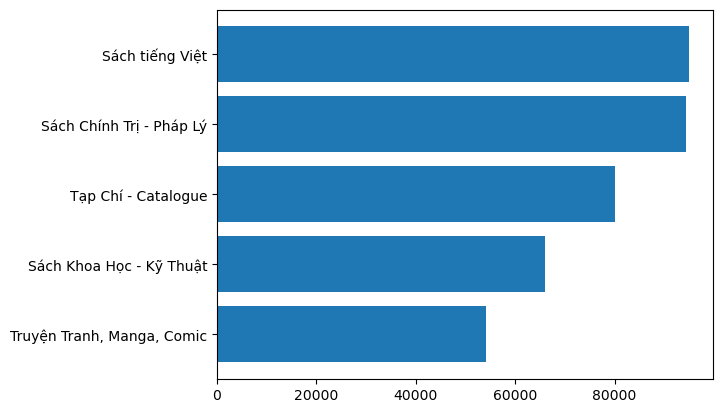

In [34]:
ave_5_low_cate = my_book_df.groupby('category')['current_price'].mean().sort_values()[:5]
plt.barh(ave_5_low_cate.keys(), ave_5_low_cate.values)
plt.show()

As we can see above, there are 5 categories:
+ Sách tiếng Việt
+ Sách chính trị - pháp lý
+ Tạp chí - Catalogue
+ Sách khoa học - kỹ thuật
+ Truyện tranh manga, comic

Step 3 + Step 3.1 + Step 3.2: For each above category, take out their lowest price of a book. We then plot out

In [35]:
# Step 3 + 3.1
lowest_book_price = my_book_df.groupby('category')['current_price'].min().sort_values()
lowest_book_quantity = my_book_df.groupby('category')['current_price'].idxmin().sort_values()
lowest_book_quantity

category
Sách Kiến Thức Tổng Hợp               480226
Sách văn học                          832239
Sách kỹ năng sống                    3955683
Sách Bà mẹ - Em bé                   4080373
Sách Khoa Học - Kỹ Thuật            16082945
Sách Thường Thức - Gia Đình         32192510
Sách kinh tế                        39521136
Truyện Tranh, Manga, Comic          83004183
Thể Dục - Thể Thao                  85924601
Sách Chính Trị - Pháp Lý            94132196
Sách Tâm lý - Giới tính            109298270
Sách Giáo Khoa - Giáo Trình        113656455
Sách Y Học                         160488838
Điện Ảnh - Nhạc - Họa              185067342
Sách Tôn Giáo - Tâm Linh           186239095
Sách Tham Khảo                     189558675
Sách Công Nghệ Thông Tin           189765038
Sách thiếu nhi                     197588263
Sách Văn Hóa - Địa Lý - Du Lịch    197920813
Tạp Chí - Catalogue                198587700
Sách Học Ngoại Ngữ                 203875661
Sách tiếng Việt                    204374127
S

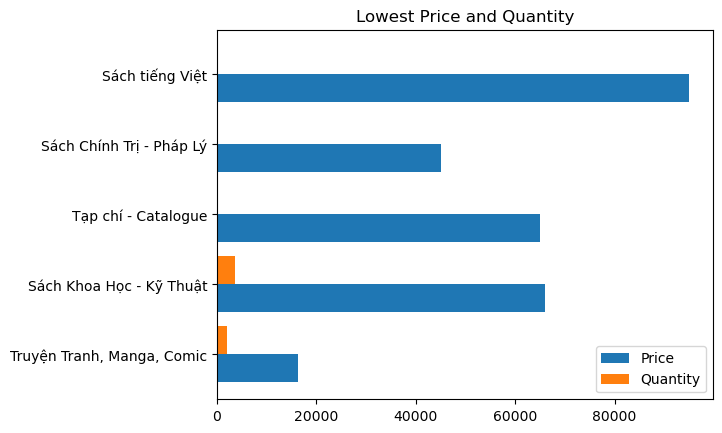

In [42]:
# Step 3.2
x_price = [16400, 66000, 65000, 45000, 95000]
y_quantity = [2115, 3591, 15, 291, 38]
ind = np.arange(5)

plt.barh(ind-0.2, x_price, 0.4, label="Price")
plt.barh(ind+0.2, y_quantity, 0.4, label="Quantity")
plt.title("Lowest Price and Quantity")
plt.yticks(ind, ['Truyện Tranh, Manga, Comic', 'Sách Khoa Học - Kỹ Thuật',
                       'Tạp chí - Catalogue', 'Sách Chính Trị - Pháp Lý', 'Sách tiếng Việt'])
plt.legend()
plt.show()

As you can see above, the quantity of the books are so small that we can't see them on a graph. But we can see that categories like Manga and Science are higher than the others in term of quantity. Politics-wise, it even though is the second lowest, it amounts to less than a thousand sold books.

Step 4: Choose the 50 most bought items and extract the original price, current price and category

In [37]:
# Step 4
highest_quantity_book = my_book_df.sort_values(by='quantity', ascending=False)[['original_price', 'current_price', 'quantity', 'category']][: 50]
highest_quantity_book.head()

,original_price,current_price,quantity,category
product_id,,,,
75307228,168000,110800,671121.0,Sách kỹ năng sống
26114399,89000,57001,65623.0,Sách kỹ năng sống
750578,109000,68670,59734.0,Sách văn học
74021317,108000,64800,53075.0,Sách văn học
10005245,188000,135300,48419.0,Sách kỹ năng sống


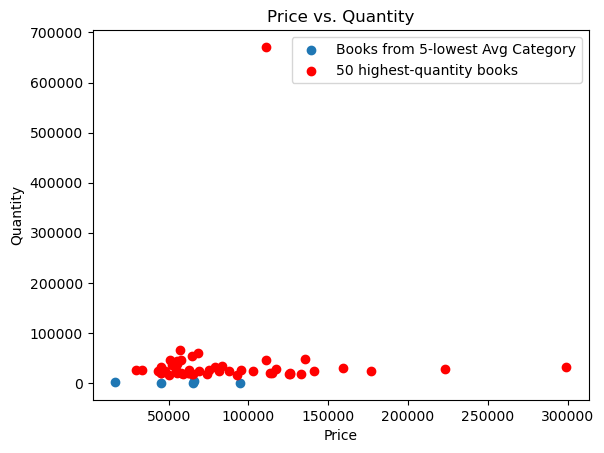

In [38]:
plt.scatter(x_price, y_quantity)
plt.scatter(highest_quantity_book['current_price'].to_numpy(), highest_quantity_book['quantity'].to_numpy(), color='red')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title("Price vs. Quantity")
plt.legend(['Books from 5-lowest Avg Category', '50 highest-quantity books'])
plt.show()

**Conclusion for Question 1:**

5 books we choose from the 5 cheapest categories/genres are not a good representation of the current book market and cannot answer our questions. But when we compare them to 50 highest-quantity books, we have a good overview of how the book market functions.

People tend to buy books in between 50.000 to 100.000 VND. We also notice that the original price of these books are mostly over 100.000 VND so when there is a sale season, it is time that people will spend more money on books they think:
+ The sale price (or current_price as the author states) is around 150.000 VND or less
+ The product includes a bundle/combo of presents and/or books
+ Cheaper than going to an actual bookstore
+ Popularity of a book
+ ...

Still, even though the comic category has the lowest quantity among all categories, in reality, most book publishers tend to exclusively release them with a very small amount on online platforms. That is why even though it has the cheapest average price, it also shares a similarity with the quantity. The "camping for a new release" culture is relatively new in Vietnam but it is slowly surging in many aspects, including the release of a new phone, new comic from a famous series... We can find them if we follow on the official page on social media about their schedule and releasing date.

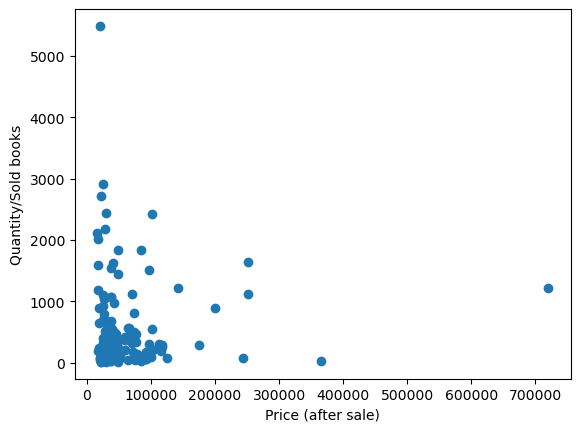

In [39]:
# This is for comic category
comic_df = my_book_df[my_book_df['category']=='Truyện Tranh, Manga, Comic'][['current_price', 'quantity']]
plt.scatter(comic_df.iloc[:, 0].to_numpy(), comic_df.iloc[:, 1].to_numpy())
plt.ylabel("Quantity/Sold books")
plt.xlabel("Price (after sale)")
plt.show()

For the Comic one, I have dedicated a graph to explain why the average price is low but still cannot have a high amount of total sold books. I have come up with a few reasons:
+ Mangas are usually cheap, if we buy them online, we have to pay the shipping fee which could be as high as half the price of a manga, which is not economic at all.
+ They are released exclusively, meaning that some mangas series only release for a certain amount of time or with a limited quantity hence causing them to be low in the total sold books. This is also because buying them in that time is cheaper than waiting for them to be publicliy release around bookstores and so on. 
+ After market is also a reason to the low selling rate. Some books when they pass throught the highest "hot" peak (most anticipated time), they can be sold to be as low as half of the original price so buying online is not a very wise option.

## Question 2: Do users prefer foreign or Vietnamese authors? And on which categories do the foreign outnumber in terms of quantity and vice versa?

Authors play an important role in users buying books. Many readers buy books because of the authors. It is indeed that foreign authors are much popular among readers than that of Vietnamese authors. We want to know whether foreign authors attract more readers or Vietnamses authors will attract more based on their popularity.

Here are the steps:
+ Step 1: Classifiy language based on the author's birth country
+ Step 2: Group the language by the total amount of quantity
+ Step 3: Choose the 5 categories with high amount of quantity and compare

In [74]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 4.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=004197ddd5864ca6a93df9b4ad2b357e3af2786ef56d3b3dda56340fe97b046c
  Stored in directory: /home/numkiki/.cache/pip/wheels/fc/af/97/539976921e53b1542a28f7160e511ac730b5d2cdcb41423ebb
Successfully built langdetect


In [95]:
from langdetect import detect
author_origin = []
for i in my_book_df.index:
    if (type(my_book_df['authors'][i]) == float or my_book_df['authors'][i] == "." or my_book_df['authors'][i] == ".." or my_book_df['authors'][i] == " "):
        author_origin.append('other')
    elif detect(my_book_df['authors'][i]) == "vi":
        author_origin.append('vi')
    else:
        author_origin.append('other')
my_book_df['author_origin'] = author_origin

{'other', 'vi'}

Now we group the `author_origin` and `category` and count the amount of books + sum of total books sold of each category 

In [153]:
lang_df_count = my_book_df.groupby(['author_origin', 'category']).count()
lang_df_sum = my_book_df.groupby(['author_origin', 'category']).sum()
# lang_df_count[['quantity']]
lang_df = my_book_df.groupby(['author_origin']).count()
lang_df

,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
author_origin,,,,,,,,,,,
other,1312,1173,1312,1312,1273,1312,1312,1312,1103,1312,1312
vi,464,464,464,464,458,464,464,464,423,464,464


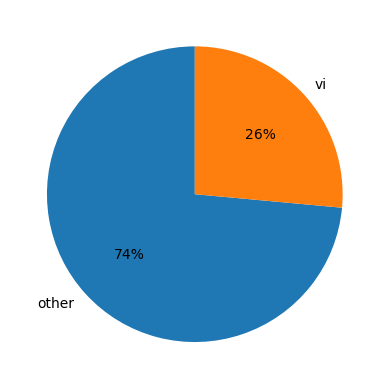

In [158]:
plt.pie(lang_df['quantity'].to_numpy(), labels = ['other', 'vi'], startangle = 90, autopct='%1.0f%%')
plt.show()

After looking at the data above, we choose the categories which the quantity is over 100. We then plot out and compare the categories: Kinh tế học, Thiếu nhi, Văn học, Manga, Kỹ năng sống

In [144]:
category = ["Kinh tế học", "Thiếu nhi", "Văn học", "Manga", "Kỹ năng sống"]

vi_quantity_count = [30, 27, 167, 1, 99]
other_quantity_count = [205, 88, 315, 189, 248]

vi_quantity_sum = [114080, 28678, 379729, 325, 422964]
other_quantity_sum = [587839, 155874, 921491, 87076, 1374827]

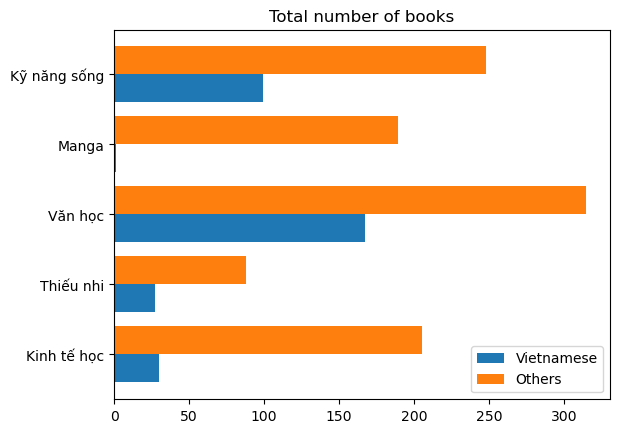

In [146]:
plt.barh(ind-0.2, vi_quantity_count, 0.4, label="Vietnamese")
plt.barh(ind+0.2, other_quantity_count, 0.4, label="Others")
plt.title("Total number of books")
plt.yticks(ind, ["Kinh tế học", "Thiếu nhi", "Văn học", "Manga", "Kỹ năng sống"])
plt.legend()
plt.show()

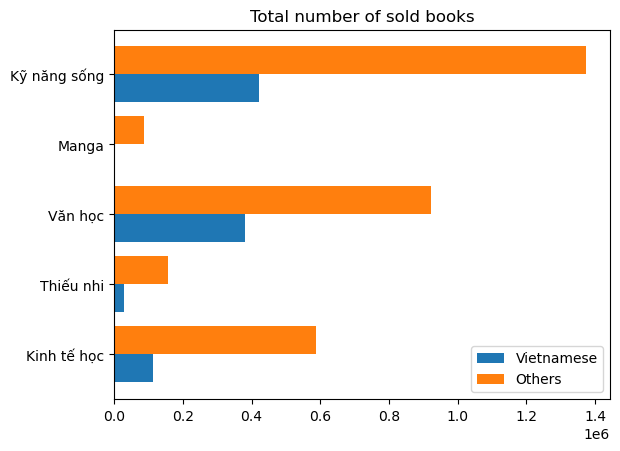

In [148]:
plt.barh(ind-0.2, vi_quantity_sum, 0.4, label="Vietnamese")
plt.barh(ind+0.2, other_quantity_sum, 0.4, label="Others")
plt.title("Total number of sold books")
plt.yticks(ind, ["Kinh tế học", "Thiếu nhi", "Văn học", "Manga", "Kỹ năng sống"])
plt.legend()
plt.show()

**Conclusion for question 2**

As shown in the plots above, the "Others" category accounts for over 75% of all books in the Tiki platform.
The "Others" section has more books than the "Vietnamese" section.
Finally, based on the overall number of books sold, it is apparent that they outperform anything from "Vietnamese."
But why would the "Vietnamse" can't catch up with the "Others"? There are some reasons we deduct based on the data:
+ The content from "Other" authors is more intriguing than the majority of Vietnamese authors. 
+ Foreign content is valued by online platforms, which raises the price. This devalues the Vietnamese ones. 
+ Foreign book references are far more useful than Vietnamese book references. Some Vietnamese books cite international books as well.
+ A lot of famous authors has a strong reputation for a very long time. In Văn học, a lot of authors can be listed like: J.K.Rowling, Marc Levy... They have a big fan base in Vietnam and will support the authors as much as they can.

Overall, we can conclude that: based on the data, the majority of top books from other countries attract more Vietnamese readers whereas, very few Vietnamese authors can make into the top list or the best-selling list. Although in the current state, lots of Vietnamese authors have potentials and they are very creative, they still struggle to find a way to make their books interesting and attract more readers to increase the selling rate.